# ¿Qué es Web Scraping?

**Web Scraping**, también conocido como **web harvesting** o **web extraction**, es una técnica de extracción de datos de los sitios web. Nos permite extraer una gran cantidad de datos / información de los sitios web, y así mismo guardarlos ya sea en un archivo o tabla de una base de datos. De igual manera, podemos decir que esta técnica nos permite transformar los datos no estructurados de la web en datos estructurados.

<img src="images/web-scraping.png" width="600">

# ¿Cuándo usar Web Scraping?

Existen muchas formas de extraer información de la web. La mejor forma de extraer información de la web es mediante el uso de APIs. Casi todos los sitios web populares como Google, Facebook, Twitter, Stackoverflow y Spotify proporcionan **APIs** para extraer su información de una manera estructurada. En el módulo de *Introducción a Pandas*, pudimos hacer uso del [API Graph de Facebook](https://developers.facebook.com/tools/explorer/?classic=0) para poder extraer información tal como el perfil público, historia de likes y de tagged places.

<img src="images/api-facebook.png" width="700">
<img src="images/facebook-graph.png" width="700">

Sin embargo, no todos los sitios web proporcionan APIs para acceder a su información, ya que no desean que se extraigan sus datos. Entonces, en este caso, tenemos que utilizar el **web scraping**.

# ¿Cómo funciona el Web Scraping?

<img src="images/web-scraping-process.png" width="700">

# ¿Por qué deberíamos usar Web Scraping?

A veces necesitamos cierta información de algún sitio web que no cuenta con un API, y tal vez deseamos verificar la información cambiante como los precios de diferentes productos en el sitio web de un e-commerce, la temperatura en una ciudad o rastrear los altibajos de bitcoin sin consultar constantemente el sitio web. Para lograr esto, escribiremos un programa que nos ayudará con la información requerida sin ir directamente a la web.

Para realizar Web Scraping, necesitamos:

1. Buscar una página web.
2. Inspeccionar la página web.
3. Crear el código con la lógica para la extracción de los datos.
4. Almacenar los resultados.

Para un mejor entendimiento, intentemos scrapear los datos de un sitio web tal como [AdondeVivir.com](https://www.adondevivir.com/).

<img src="images/adondevivir.png" width="700">

Se nos encomendado una tarea muy importante que consiste en investigar un poco sobre el sector Inmobiliario. Por ejemplo, queremos entender el comportamiento del precio de los inmuebles, que se encuentran en alquiler en Lima, en base a su geolocalización. 

1. ¿Podemos hacer esto?
2. ¿Tenemos data para hacerlo?
3. ¿Una vez que tengamos la data, que podemos hacer?

# Librerías de Web Scraping

En esta sesión, haremos uso de las siguientes librerías para poder realizar Web Scraping:

1. [Requests](http://docs.python-requests.org/en/master/): Esta librería nos permitirá hacer peticiones HTTP.
2. [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/): Módulo para analizar documentos HTML. Esta biblioteca crea un árbol con todos los elementos del documento y puede ser utilizado para extraer información.
3. [Selenium](http://selenium-python.readthedocs.io/): Módulo que se usa para automatizar la interacción con el navegador web desde Python.

¿Son las únicas librerías que existen para realizar Web Scraping? En realidad ... no. Existen otros módulos tales como:

1. [Scrapy](https://scrapy.org/): Framework de código abierto y colaborativo para extraer los datos que necesita de los sitios web. Es más eficiente que BeautifulSoup.
2. [lxml](https://lxml.de/): Módulo para procesar documentos XML y HTML.
3. [re](https://docs.python.org/2/library/re.html): Módulo para encontrar patrones dentro de una cadena de texto.

# Instalación de Librerías

In [1]:
# Librería Requests
!pip install requests

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Librería BeautifulSoup
!pip install beautifulsoup4

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Para realizar la instalación de selenium, revisar el siguiente [Link](http://selenium-python.readthedocs.io/installation.html#).

In [3]:
# Librería Selenium
!pip install selenium

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


Como se mencionó en la descripción de `Selenium`, este módulo nos permite automatizar interacciones con el navegador (ya sea Chrome, Firefox, Edge, Safari, Phantom).

Para ello, necesitamos de un **Driver** que sirva como interfaz ante el navegador. Por ejemplo, `Firefox` requiere [geckodriver](https://github.com/mozilla/geckodriver/releases). En la siguiente tabla se listan los drivers necesarios para cada navegador:

| Navegador | Driver 
| --- | :---: 
| **Chrome:** |   https://sites.google.com/a/chromium.org/chromedriver/downloads  
| **Edge:** |   https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/  
| **Firefox:** |   https://github.com/mozilla/geckodriver/releases  
| **Safari:** |   https://webkit.org/blog/6900/webdriver-support-in-safari-10/  

En este caso, utilizaremos [`Firefox`](https://www.mozilla.org/es-ES/firefox/download/thanks/) como navegador, por lo que necesitamos instalarlo. Para instalarlo en Linux, usar el siguiente [enlace](https://support.mozilla.org/en-US/kb/install-firefox-linux).

Una vez instalada las librerías necesarias, hagamos las pruebas correspondientes para verificar que todo esté correctamente instalado.

In [4]:
# importar la librería requests
import requests

In [5]:
# importar la librería BeautifulSoup
from bs4 import BeautifulSoup

In [6]:
# importar la librería Selenium
from selenium import webdriver
from selenium.webdriver.firefox.firefox_binary import FirefoxBinary

In [7]:
# Definir los path donde se encuentran Firefox y su driver geckodriver
firefox_path = 'C:\\Program Files\\Mozilla Firefox\\firefox.exe'
driver_path = 'C:\\Users\\S73984\\Notebooks\\ParaTi\\Scraping\\geckodriver.exe'

In [8]:
# Instanciar el objeto Driver usando los path definidos
binary = FirefoxBinary(firefox_path)
driver = webdriver.Firefox(firefox_binary=binary, executable_path=driver_path)

¿Qué ocurrió al instanciar el objeto `Driver`?

In [9]:
# Definir Url de la página que vamos a Scrapear
url = "https://www.adondevivir.com/departamentos-en-alquiler-en-lima.html"

# Pasos para realizar Web Scraping

### 1. Hacer una petición a la Web

#### Usando la librería Requests

In [10]:
# Hagamos una petición a la url usando el método get del módulo requests
page = requests.get(url)

b'<!DOCTYPE html>\n<html lang="es-PE">\n\t\n    <head>\n\t<meta charset="utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<title>Departamentos en alquiler en Lima - AdondeVivir</title>\n\t<meta name="keywords" content="Alquiler,Departamento,Lima,Edificio &quot;Arequipa Central&quot;,EL MARQUEZ II &#9;,AdondeVivir,Propiedades,Inmuebles" />\n\t<meta name="description" content="En AdondeVivir tenemos 4,504 departamentos en alquiler en Lima. Utiliza nuestros filtros de b\xc3\xbasqueda y accede a las mejores propiedades del pa\xc3\xads!" />\n\t<meta name="viewport" content="width=device-width">\n\t<meta name="referrer" content="always">\n\n\t<!-- Interfaz --> \n\n\t<link rel="preconnect" href="//imgar.zonapropcdn.com">\n\n<link rel="preconnect" href="//maxcdn.bootstrapcdn.com">\n\n<link rel="preconnect" href="//ajax.googleapis.com">\n\n<link rel="preconnect" href="//fonts.gstatic.com">\n\n<link rel="preconnect" href="//fonts.googleapis.com">\n\n\n\t<link as="styl
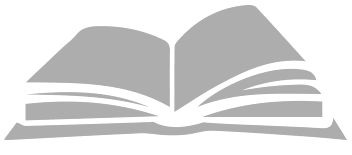

In [11]:
# Pintemos el contenido de la respuesta usando la propiedad content
page.content

In [12]:
# Instanciemos el objeto de la clase BeautifulSoup usando como parámetro el contenido de la respuesta obtenida de la petición
soup = BeautifulSoup(markup=page.content, features='html.parser')

In [13]:
# ¿Qué tipo de dato es soup?
type(soup)

bs4.BeautifulSoup

<bound method Tag.prettify of <!DOCTYPE html>

<html lang="es-PE">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Departamentos en alquiler en Lima - AdondeVivir</title>
<meta content='Alquiler,Departamento,Lima,Edificio "Arequipa Central",EL MARQUEZ II 	,AdondeVivir,Propiedades,Inmuebles' name="keywords">
<meta content="En AdondeVivir tenemos 4,504 departamentos en alquiler en Lima. Utiliza nuestros filtros de búsqueda y accede a las mejores propiedades del país!" name="description">
<meta content="width=device-width" name="viewport"/>
<meta content="always" name="referrer"/>
<!-- Interfaz -->
<link href="//imgar.zonapropcdn.com" rel="preconnect"/>
<link href="//maxcdn.bootstrapcdn.com" rel="preconnect"/>
<link href="//ajax.googleapis.com" rel="preconnect"/>
<link href="//fonts.gstatic.com" rel="preconnect"/>
<link href="//fonts.googleapis.com" rel="preconnect"/>
<link as="style" href="//img10.naventcdn.com/css/1cc9c20818ee61f7649
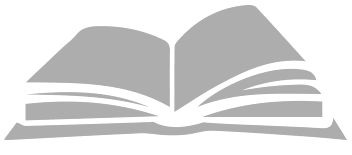

In [14]:
# Mostrar el html interpretado por BeautifulSoup
soup.prettify

In [15]:
# Mostremos el título del html
soup.title

<title>Departamentos en alquiler en Lima - AdondeVivir</title>

Si queremos extraer todos los inmuebles de esta página, definamos una estrategia para Scrapear. **Volvamos a la ppt**.

Si se han dado cuenta al inspeccionar la página, el elemento que contiene a la lista de inmuebles (sección) de una página tiene un identificador llamado `avisos-content`. Aprovechemos ese atributo para poder identificar a cada sección usando el método `find`.

In [16]:
# Encontremos el elemento que contenga los avisos de los inmuebles usando el método find
section_ = soup.find(name="ul", attrs={"id": "avisos-content"})

In [17]:
# Mostremos el contenido de este elemento
section_

<ul class="unstyled" id="avisos-content">
<li class="aviso aviso-desktop aviso--desarrollo aviso--simple " data-aviso="538948" data-href="/propiedades/edificio-arequipa-central-538948.html" data-tipoaviso="Emprendimiento simple " id="aviso-538948">
<input class="avisoInmoImg" data-error="//img10.naventcdn.com/css/img/placeholder-img.png" name="" type="hidden" value="https://img10.naventcdn.com/empresas/11/00/00/12/18/50/130x70/logo_creativa-constructora.jpg "/>
<input class="avisoInmoCertif" name="" type="hidden" value=""/>
<input class="avisoInmoTitle" name="" type="hidden" value="CREATIVA CONSTRUCTORA	"/>
<input class="avisoInmoPhone" name="" type="hidden" value="71106"/>
<input class="avisoInmoTipoAnunciante" name="" type="hidden" value="lancamentos"/>
<input class="avisoPrecio" name="" type="hidden" value="S/ 446,000"/>
<div class="aviso-tags">
<span class="aviso-tags-emprendimiento">
				Proyecto
			</span>
</div>
<div class="aviso-data">
<div class="aviso-media">
<span class="avi

#### ¿Que pasó? ¿Por qué no contiene a todos los inmuebles que se muestran en la Web?
<img src="images/why-meme.png" width="400">

#### ¿Y si probamos con Selenium?

In [18]:
# Aprovechando que tenemos levantado Firefox, mediante el uso del Driver podemos ingresar a la url definida usando el método get
driver.get(url=url)

** ¿Veamos que sucede en Firefox? **


<img src="images/see-Firefox.jpg" width="400">

'<html lang="es-PE"><head>\n\t<meta charset="utf-8">\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n\t<title>Departamentos en alquiler en Lima - AdondeVivir</title>\n\t<meta name="keywords" content="Alquiler,Departamento,Lima,Edificio &quot;Arequipa Central&quot;,EL MARQUEZ II \t,AdondeVivir,Propiedades,Inmuebles">\n\t<meta name="description" content="En AdondeVivir tenemos 4,504 departamentos en alquiler en Lima. Utiliza nuestros filtros de búsqueda y accede a las mejores propiedades del país!">\n\t<meta name="viewport" content="width=device-width">\n\t<meta name="referrer" content="always">\n\n\t<!-- Interfaz --> \n\n\t<link rel="preconnect" href="//imgar.zonapropcdn.com">\n\n<link rel="preconnect" href="//maxcdn.bootstrapcdn.com">\n\n<link rel="preconnect" href="//ajax.googleapis.com">\n\n<link rel="preconnect" href="//fonts.gstatic.com">\n\n<link rel="preconnect" href="//fonts.googleapis.com">\n\n\n\t<link as="style" rel="preload" href="//img10.naventcdn.com/css
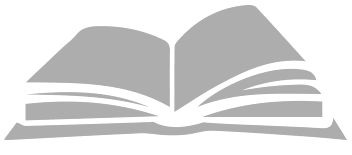

In [19]:
# Pintemos el contenido de la respuesta usando la propiedad content
driver.page_source

In [20]:
# Instanciemos el objeto de la clase BeautifulSoup usando como parámetro el contenido de la respuesta obtenida de la petición
soup = BeautifulSoup(markup=driver.page_source, features='html.parser')

<bound method Tag.prettify of <html lang="es-PE"><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Departamentos en alquiler en Lima - AdondeVivir</title>
<meta content='Alquiler,Departamento,Lima,Edificio "Arequipa Central",EL MARQUEZ II 	,AdondeVivir,Propiedades,Inmuebles' name="keywords"/>
<meta content="En AdondeVivir tenemos 4,504 departamentos en alquiler en Lima. Utiliza nuestros filtros de búsqueda y accede a las mejores propiedades del país!" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="always" name="referrer"/>
<!-- Interfaz -->
<link href="//imgar.zonapropcdn.com" rel="preconnect"/>
<link href="//maxcdn.bootstrapcdn.com" rel="preconnect"/>
<link href="//ajax.googleapis.com" rel="preconnect"/>
<link href="//fonts.gstatic.com" rel="preconnect"/>
<link href="//fonts.googleapis.com" rel="preconnect"/>
<link as="style" href="//img10.naventcdn.com/css/1cc9c20818ee61f7649acbce2ccee2bc83e
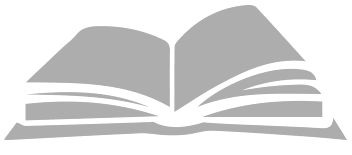

In [21]:
# Mostrar el html interpretado por BeautifulSoup
soup.prettify

In [22]:
# Encontremos el elemento que contenga los avisos de los inmuebles usando el método find
section_ = soup.find(name="ul", attrs={"id": "avisos-content"})

In [23]:
# Mostremos el contenido de este elemento
section_

<ul class="unstyled" id="avisos-content">
<li class="aviso aviso-desktop aviso--desarrollo aviso--simple " data-aviso="538948" data-href="/propiedades/edificio-arequipa-central-538948.html" data-tipoaviso="Emprendimiento simple " id="aviso-538948">
<input class="avisoInmoImg" data-error="//img10.naventcdn.com/css/img/placeholder-img.png" name="" type="hidden" value="https://img10.naventcdn.com/empresas/11/00/00/12/18/50/130x70/logo_creativa-constructora.jpg "/>
<input class="avisoInmoCertif" name="" type="hidden" value=""/>
<input class="avisoInmoTitle" name="" type="hidden" value="CREATIVA CONSTRUCTORA	"/>
<input class="avisoInmoPhone" name="" type="hidden" value="71106"/>
<input class="avisoInmoTipoAnunciante" name="" type="hidden" value="lancamentos"/>
<input class="avisoPrecio" name="" type="hidden" value="S/ 446,000"/>
<div class="aviso-tags">
<span class="aviso-tags-emprendimiento">
				Proyecto
			</span>
</div>
<div class="aviso-data">
<div class="aviso-media">
<span class="avi

#### ¿Que pasó? Ahora sí contiene la lista de Inmuebles.

<img src="images/success-request.jpg" width="400">

Antes de empezar con la estrategia definida en la ppt, empecemos a definir una función llamada `load_html()` que nos permita definir como parametro la `dirección url` y nos devuelva como resultado un objeto de la clase `BeautifulSoup`.

In [24]:
def load_html(url, type_="selenium"):
    '''
    Función que nos permita instanciar un objeto de la clase BeautifulSoup a partir de una Url.
    Input:
        - url: Dirección url que contiene la lista de inmuebles.
    Output:
        - soup: Objeto de la clase BeautifulSoup que va a ser objeto de Scraping.
    '''
    if type_ == "requests":
        page = requests.get(url)
        soup = BeautifulSoup(markup=page.content, features='html.parser')
    else:
        driver.get(url)
        soup = BeautifulSoup(markup=driver.page_source, features='html.parser')
    return soup

<html lang="es-PE"><head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<title>Departamentos en alquiler en Lima - AdondeVivir</title>
<meta content='Alquiler,Departamento,Lima,Edificio "Arequipa Central",EL MARQUEZ II 	,AdondeVivir,Propiedades,Inmuebles' name="keywords"/>
<meta content="En AdondeVivir tenemos 4,504 departamentos en alquiler en Lima. Utiliza nuestros filtros de búsqueda y accede a las mejores propiedades del país!" name="description"/>
<meta content="width=device-width" name="viewport"/>
<meta content="always" name="referrer"/>
<!-- Interfaz -->
<link href="//imgar.zonapropcdn.com" rel="preconnect"/>
<link href="//maxcdn.bootstrapcdn.com" rel="preconnect"/>
<link href="//ajax.googleapis.com" rel="preconnect"/>
<link href="//fonts.gstatic.com" rel="preconnect"/>
<link href="//fonts.googleapis.com" rel="preconnect"/>
<link as="style" href="//img10.naventcdn.com/css/1cc9c20818ee61f7649acbce2ccee2bc83e9618fb18644202a84e11322e86c72_
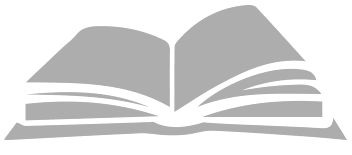

In [25]:
load_html(url)

De igual manera, existen algunos casos en los que al buscar un elemento dentro de un objeto `Soup` no lo encontramos porque no siempre existen.

En estos casos, vamos a requerir de una función que nos permita obtener el valor de ese elemento siempre y cuando el elemento exista dentro del objeto `soup`.

Como quedo pendiente en la clase pasada, la [diferencia](https://www.geeksforgeeks.org/difference-operator-python/) entre `is` y `==` es que `==` hace la comparación a nivel de valor pero `is`lo hace a nivel de objeto (si apuntan al mismo).

In [26]:
def get_text(soup):
    '''
    Función que nos permite obtener el valor de un elemento Soup siempre y cuando exista.
    Input:
        - soup: Objeto de la clase BeautifulSoup de la que se quiere extraer el valor con el método get_text().
    Output:
        - value: Si el objeto soup existe, es el valor obtenido del método get_text(). De lo contrario, devuelve None.
    '''
    if soup is not None:
        value = soup.get_text()
    else:
        value = None
    return value

### 2. Extracción de datos con Beautiful Soup

En base a la estrategia definida, empecemos a crear las funciones `section_scraping()`, `window_scraping()` y `unit_scraping()`

In [48]:
def section_scraping(url, unit_list):
    '''
    Función recursiva que devuelve una lista de inmuebles de una sección.
    Input:
        - url: Dirección url que contiene la lista de inmuebles.
        - unit_list: Lista de inmuebles a la que se va a agregar la lista de inmuebles de la dirección url indicada.
    Output:
        - unit_list: Lista de inmuebles actualizada.
    '''

    # Pintar url actual y cuantos inmuebles se tiene antes de scrapear la pagina actual
    

    # Obtener el objeto de la clase BeautifulSoup a partir de la url


    # Identificar el elemento de sección que contiene todas las ventanas


    # Invocar a la función window_scraping() para todas las ventanas de la Lista que contiene section_


    # Lógica de Navegación entre páginas
    ## Identificar el elemento que contenga la lista de índices de paginación


    ## Identificar el elemento que nos dirige a la siguiente página


    ## Definir lógica de navegación
    ### Si next_pagination_ tiene valor, debemos encontrar la url a la que nos dirige.
    ### Añadir la lógica de que cuando nos de como url el valor de "#" debe devolvernos la lista final, sino debe invocar
    ### a la función section_scraping() con la lista actualizada y con la nueva url como parametros.




In [28]:
import re

In [29]:
def window_scraping(window_):
    '''
    Función que nos devuelve los datos a partir de un ventana (que es un objeto de la clase BeautifulSoup).
    Input:
        - window_: Objeto de la Clase BeautifulSoup.
    Output:
        - window_dict: Diccionario con las variables como keys y los valores como values.
    '''
    # Extraer el valor del elemento que contiene el Tag. El atributo y valor que los identifica son "class" y "aviso-tags"
    # respectivamente. Usar el módulo re para limpiar el valor del Tag.
    
    
    # Incluir lógica de solo extraer los datos de aquellos inmuebles que no son del tag "Proyecto" porque queremos
    # viviendas que actualmente se encuentren en alquiler
    
        
        # Identificar el elemento que esta en la zona izquierdo de la ventana
        # donde se encuentran la lista de imagenes, el precio y el id.
        
        
        ## Identificar el elemento donde se encuentra la lista de imagenes y el id del inmueble.
        
        
        ### Identificar el slider donde se encuentra la lista de imagenes
        
        
        #### Extraer la lista de imágenes
        
        
        
        #### Extraer el identificador del inmueble
        
        
        ## Identificar el elemento donde se encuentra el precio y los gastos de mantenimiento del inmueble.
        
        
        ### Extraer el valor del precio
        
        
        ### Extraer el valor del gasto de mantenimiento
        
        
        # Identificar el elemento que esta en la zona derecha de la ventana
        # donde se encuentran el título, url, dirección, lista de características, descripción y fecha de publicación.
        
        
        ## Extraer el valor del título
        
        
        ## Extraer el valor de la dirección url
        
        
        ## Extraer el valor de la dirección
        
        
        ## Extraer el elemento que contiene la lista de características del inmueble
        
        
        ### Extraer el valor de la lista de características del inmueble
        

        ### Extraer el valor de la lista de características del inmueble
        
        
        ### Extraer el valor de la lista de características del inmueble
        
        
        # Definir el diccionario con las variables extraídas como keys y los valores como values
        
        
        # Extraer valores del inmueble que solo se encuentran en la página personalizada del inmueble
        # Usar la función unit_scraping()
        
        
        # Concatenar los 2 diccionarios: window_unit y unit_dict
        
        
        # Devolver window_dict como resultado
        
    
        # Cuando el inmueble tiene el tag "Proyecto" devuelve un diccionario sin elementos
        

In [30]:
def unit_scraping(url):
    '''
    Función que nos devuelve los datos del inmueble a partir de su url.
    Input:
        - url: Dirección url que contiene la lista de inmuebles.
    Output:
        - unit_dict: Diccionario con las variables como keys y los valores como values.
    '''
    # Pintar la url actual
    
    
    # Obtener el objeto de la clase BeautifulSoup a partir de la url
    
    
    # Identificar el elemento donde se encuentran las coordenadas del inmueble.
    
    
    ## Lógica para extraer los valores de las coordenadas del inmueble
    
        ### Extraer el valor de la latitud del inmueble
        
        ### Extraer el valor de la longitud del inmueble
        
    
        
    
    # Definir el diccionario con las variables extraídas como keys y los valores como values
    
    
    # Devolver unit_dict como resultado
    

### 3. Ejecución del Scrapper

In [49]:
unit_list = section_scraping(url, [])

Section: https://www.adondevivir.com/departamentos-en-alquiler-en-lima.html, Actual: 0 inmuebles
	url: https://www.adondevivir.com/propiedades/piscina-jacuzzi-frente-al-hilton-4dorm-miraflores-51193217.html
	url: https://www.adondevivir.com/propiedades/alquiler-barranco-limite-miraflores-2dorm-2.5banos-53227790.html
	url: https://www.adondevivir.com/propiedades/departamento-en-surco-us-$850-3-dorm-cristobal-de-54598656.html
	url: https://www.adondevivir.com/propiedades/departamento-de-estreno-en-alquiler-54759162.html
	url: https://www.adondevivir.com/propiedades/amoblado-equipado-p-ejecutivo-o-extranjero-comodo-54528940.html
	url: https://www.adondevivir.com/propiedades/estreno-modernisimo-departamento-de-1-dorm-en-54734717.html
	url: https://www.adondevivir.com/propiedades/chacarilla.-bello-dpto-3-dorm-terraza-2-coch-dep.-54732450.html
	url: https://www.adondevivir.com/propiedades/departamento-de-estreno-en-edificio-canvas-miraflores-54720206.html
	url: https://www.adondevivir.com/pr

In [ ]:
print('Hemos scrapeado datos de {0} inmuebles.'.format(len(unit_list)))

In [31]:
import pandas as pd

In [ ]:
df = pd.DataFrame(unit_list)

In [ ]:
df.info()

In [22]:
# Eliminar aquellos registros que tengan algun nulo en las variables "unit_id", "latitude" o "longitude"
df.dropna(subset=["unit_id", "latitude", "longitude"], inplace=True)

In [23]:
df

description  \
3     \n\t\t\t\tTenemos en alquiler un departamento ...   
4     \n\t\t\t\tAlquiler Temporal de Apartamentos am...   
5     \n\t\t\t\tPaseo de la República-28 de Julio, M...   
6     \n\t\t\t\tDescripción. Acogedor departamento a...   
7     \n\t\t\t\tAlquiler Sin Muebles. Barranco. Lími...   
8     \n\t\t\t\tEspectacular departamento en el cent...   
9     \n\t\t\t\tEdificio de 10 pisos, 30 departament...   
10    \n\t\t\t\t01 Mini departamento de 01 dormitori...   
11    \n\t\t\t\tTrato directo con el propietario, po...   
12    \n\t\t\t\tExclusivo departamento estilo contem...   
13    \n\t\t\t\tSe Alquila departamento de 100 m2 co...   
14    \n\t\t\t\t* estreno modernisimo departamento d...   
15    \n\t\t\t\tSe alquila hermoso departamento de e...   
16    \n\t\t\t\tAvenida arequipa, cerca al Parque Ke...   
17    \n\t\t\t\tTrato directo con propietario 9. 9. ...   
18    \n\t\t\t\tPor motivos de trabajo en otra ciuda...   
19    \n\t\t\t\tHermoso departamento de estreno en e...   
20    \n\t\t\t\tExcelente oportunidad si estás busca...   
21    \n\t\t\t\tSe Alquila departamento de 127 m2 en...   
22    \n\t\t\t\tLindo departamento con vista al mar....   
23    \n\t\t\t\tHermosa vista y amplisimo con 200 m2...   
24    \n\t\t\t\tChacarilla, surco. excelente ubicaci...   
25    \n\t\t\t\tAlquilo departamento en calle Piura ...   
26    \n\t\t\t\tPenthouse Duplex en alquiler con vis...   
27    \n\t\t\t\tCómodo departamento amoblado, equipa...   
28    \n\t\t\t\t* si usted busca vivir en un departa...   
29    \n\t\t\t\tContamos con 01. 02, 03 y 04 dormito...   
30    \n\t\t\t\tReferencia y cerca a qué establecimi...   
31    \n\t\t\t\tSe Alquila departamento de 80 m2, el...   
32    \n\t\t\t\tAlquilo lindo y acogedor departament...   
...                                                 ...   
4466  \n\t\t\t\tBonito departamento Nuevo de Estreno...   
4467  \n\t\t\t\tLindo departamento en edificio diseñ...   
4468  \n\t\t\t\tHermoso Departamento en pleno centro...   
4469  \n\t\t\t\tMidori kishimoto cel: 991*892*141. E...   
4470  \n\t\t\t\tSe alquila exclusivo departamento en...   
4471  \n\t\t\t\tHermoso Departamento de 105 mt2 ubic...   
4472  \n\t\t\t\tCalle nicolas de rivera - piso 3. al...   
4473  \n\t\t\t\tSe alquila Departamento ; sala, come...   
4474  \n\t\t\t\tAlquilo amplio departamento amoblado...   
4475  \n\t\t\t\tPrecioso departamento con vista espe...   
4476  \n\t\t\t\tDepartamento en alquiler. teruel - m...   
4477  \n\t\t\t\tAlquilo departamento amoblado Y equi...   
4479  \n\t\t\t\tInversión $800. Dos de garantía y un...   
4480  \n\t\t\t\tDepartamento en alquiler en santiago...   
4481  \n\t\t\t\tPenthouse duplex. A. O. 330 m2. A. C...   
4483  \n\t\t\t\tLindo departamento en calle tranquil...   
4484  \n\t\t\t\tEn la mejor zona residencial y comer...   
4485  \n\t\t\t\tAlquiler de lindo minidepartamento a...   
4486  \n\t\t\t\tAlquilo, espectacular penthouse trip...   
4487  \n\t\t\t\tDepartamento de 3 habitaciones, tres...   
4488  \n\t\t\t\tDepartamento de 130m2, 3 dormitorios...   
4489  \n\t\t\t\t- Ubicación: Av Sergio Bernales - (A...   
4490  \n\t\t\t\tDepartamento en alquiler de 100 M2, ...   
4492  \n\t\t\t\tAlquilo Bello y amplio departamento ...   
4494  \n\t\t\t\tAlquilo Bello y amplio departamento ...   
4495  \n\t\t\t\tAlquilo Bello y amplio departamento ...   
4496  \n\t\t\t\tAlquilo amplio departamento de 93m2 ...   
4498  \n\t\t\t\tAlquilo amplio departamento de 93m2 ...   
4499  \n\t\t\t\tAlquilo Bello departamento amoblado,...   
4500  \n\t\t\t\tAlquilo Bello y amplio departamento ...   

                                 expense  \
3       \n\t\t+ S/ 200 Mantenimiento\n\t   
4       \n\t\t+ S/ 280 Mantenimiento\n\t   
5       \n\t\t+ S/ 270 Mantenimiento\n\t   
6       \n\t\t+ S/ 180 Mantenimiento\n\t   
7       \n\t\t+ S/ 300 Mantenimiento\n\t   
8       \n\t\t+ S/ 400 Mantenimiento\n\t   
9       \n\t\t+ S/ 290 Mantenimiento\n\t   
10      \n\t\t+ S/ 150 Mantenimie

Hagamos una `limpieza` de los valores obtenidos en el Scraping.

In [ ]:
# Recorrer la lista de variables "description", "expense", "location", "publication_date", "title" y limpiar los caracteres \n y \t
for col in ["description", "expense", "location", "publication_date", "title"]:
    df.loc[pd.notnull(df[col]), col] = df.loc[pd.notnull(df[col]), col].apply(lambda t: re.sub(r'[\n+\t+]','', t))

# Limpiar cada cadena de la lista de la columna features y concatenar las cadenas en una sola cadena usando el método join con
# el caracter "|"
df["features"] = df["features"].apply(lambda f: "|".join([re.sub(r'[\n+\t+]','', e) for e in f]))

# Cambiar el tipo de dato de la columna latitude y longitude a float
df["latitude"] = df["latitude"].astype(float)
df["longitude"] = df["longitude"].astype(float)

# Limpiar el valor del precio usando el método sub del módulo re
df.loc[pd.notnull(df["price"]), "price"] = df.loc[pd.notnull(df["price"]), "price"].apply(lambda p: int(re.sub(r'(.*\s)', '', p).replace(",", "")))

# concatenar las cadenas de la lista de urls de imagenes por medio del caracter "|" usando el método join
df["img_list"] = df["img_list"].apply(lambda i: '|'.join(i))

In [28]:
# Vamos a resetear el índice
df.reset_index(drop=True, inplace=True)

In [33]:
import csv

In [34]:
# Exportar el DataFrame a un csv
df.to_csv("my_apartments.csv", index=False, quoting=csv.QUOTE_ALL)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 12 columns):
description         3963 non-null object
expense             3007 non-null object
features            3963 non-null object
img_list            3963 non-null object
latitude            3963 non-null float64
location            3963 non-null object
longitude           3963 non-null float64
price               3960 non-null object
publication_date    3963 non-null object
title               3963 non-null object
unit_id             3963 non-null object
url                 3963 non-null object
dtypes: float64(2), object(10)
memory usage: 371.6+ KB


Leer el fichero `apartments.csv` que se encuentra en la carpeta data. Este fichero contiene los **3963** inmuebles en alquiler disponibles en Lima.

In [32]:
df = pd.read_csv("data/apartments.csv", encoding="latin1")

In [33]:
df.shape

(3963, 12)

In [34]:
df.head()

description                expense  \
0  Tenemos en alquiler un departamento muy bien u...   S/ 200 Mantenimiento   
1  Alquiler Temporal de Apartamentos amoblado en ...   S/ 280 Mantenimiento   
2  Paseo de la República-28 de Julio, Miraflores....   S/ 270 Mantenimiento   
3  Descripción. Acogedor departamento amoblado li...   S/ 180 Mantenimiento   
4  Alquiler Sin Muebles. Barranco. Límite con Mir...   S/ 300 Mantenimiento   

                            features  \
0     47 m²techada|1Dormitorio|1Baño   
1  135 m²techada|4Dormitorios|3Baños   
2   98 m²techada|2Dormitorios|2Baños   
3     47 m²techada|1Dormitorio|1Baño   
4   84 m²techada|2Dormitorios|2Baños   

                                            img_list   latitude  \
0  https://img10.naventcdn.com/avisos/11/00/54/85... -12.127141   
1  https://img10.naventcdn.com/avisos/11/00/51/19... -12.128614   
2  https://img10.naventcdn.com/avisos/11/00/54/68... -12.112283   
3  https://img10.naventcdn.com/avisos/11/00/54/80... -12.091783   
4  https://img10.naventcdn.com/avisos/11/00/53/22... -12.139315   

                                            location  longitude   price  \
0              CALLE ALDABAS-Santiago de Surco, Lima -76.982959  1300.0   
1                AV 28 DE JULIO 887-Miraflores, Lima -77.024761  4600.0   
2  Av Paseo de la República, Miraflores-Miraflore... -77.026293  2560.0   
3  Av. Dos de Mayo 1566, San Isidro Lima 27, Peru... -77.040801  2000.0   
4                       av el sol 203-Barranco, Lima -77.023956  3000.0   

         publication_date                                              title  \
0    Publicado desde ayer  Alquilo Mini Departamento Cerca a La Ricardo P...   
1  Publicado hace 11 días  Piscina, Jacuzzi, Frente Al Hilton 4dorm, Mira...   
2   Publicado hace 8 días           Miraflores. Cómodo Dpto 2 Dorm  Cochera.   
3  Publicado hace 10 días  Acogedor Departamento Amoblado en La Av 2 de M...   
4  Publicado hace 16 días  Alquiler Barranco Limite Miraflores 2dorm 2.5b...   

    unit_id                                                url  
0  54853097  https://www.adondevivir.com/propiedades/alquil...  
1  51193217  https://www.adondevivir.com/propiedades/piscin...  
2  54684472  https://www.adondevivir.com/propiedades/mirafl...  
3  54803689  https://www.adondevivir.com/propiedades/acoged...  
4  53227790  https://www.adondevivir.com/propiedades/alquil...

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 12 columns):
description         3963 non-null object
expense             3007 non-null object
features            3963 non-null object
img_list            3956 non-null object
latitude            3963 non-null float64
location            3963 non-null object
longitude           3963 non-null float64
price               3960 non-null float64
publication_date    3963 non-null object
title               3963 non-null object
unit_id             3963 non-null int64
url                 3963 non-null object
dtypes: float64(3), int64(1), object(8)
memory usage: 371.6+ KB


In [36]:
df.dropna(subset=["price"], inplace=True)

# Visualizar los inmuebles en un Mapa

Para poder visualizar las coordenadas de todos los inmuebles extraídos por el proceso de Web Scraping, haremos uso de [Mapbox](https://www.mapbox.com/).

Mapbox es un proveedor de mapas on-line realizados por encargo para páginas webs como **Foursquare, Pinterest, Evernote, Financial Times, EThe Weather Channel y Uber Tecnologías**. Desde 2010, ha expandido rápidamente su nicho de mapas como respuesta a la limitada elección que ofrecen otros proveedores como Google Maps y OpenStreetMap.

<br>
<img src="images/mapbox.png" width="400">

Para poder usar mapbox, necesitamos de un token que se genera al crear una cuenta.

Para poder usar esta herramienta dentro de Jupyter, debemos instalar el módulo [mapboxgl](https://github.com/mapbox/mapboxgl-jupyter).

In [37]:
!pip install mapboxgl

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [38]:
# Importar los métodos del módulo mapboxgl
from mapboxgl.utils import *
from mapboxgl.viz import *

In [39]:
# Definir token de Mapbox
token = "pk.eyJ1IjoibWxhcmljb2JhciIsImEiOiJjams3cGU1bXEyYnl4M3hudHo5NnRheHJvIn0.6JBpRTww9Fxr5UqaYXJE5Q"

In [40]:
# Crear un archivo geojson y exportarlo a paratir del DataFrame df
df_to_geojson(df, filename='data/apartments_geopoints.geojson',
              properties=['unit_id', 'title', 'price'], 
                     lat='latitude', lon='longitude', precision=3)

{'feature_count': 3960,
 'filename': 'data/apartments_geopoints.geojson',
 'type': 'file'}

In [45]:
# Mostrar los puntos en el mapa
viz = CircleViz('data/apartments_geopoints.geojson', access_token=token, 
                radius = 2, center = (-77.021779, -12.093512), zoom = 11)
viz.show()

Ahora si queremos diferenciar los inmuebles por rangos de precios. Para ello, usemos los deciles de los valores de los precios.

Haremos uso del método `quantile` del DataFrame, que nos retorna el valor en el cuantil indicado.

¿Pero qué son los cuantiles?
Los cuantiles son puntos tomados a intervalos regulares de la función de distribución de una variable aleatoria.

In [42]:
measure = 'price'
color_breaks = [round(df[measure].quantile(q=x*0.1), 2) for x in range(1,9)]
color_stops = create_color_stops(color_breaks, colors='YlOrRd')

In [46]:
# Plotear las coordenadas de los inmuebles y especificar la variable y los puntos de corte
viz = CircleViz('data/apartments_geopoints.geojson',
                access_token=token, 
                color_property = "price",
                color_stops = color_stops,
                radius = 2.5,
                stroke_width = 0.2,
                center = (-77.043322, -12.043980),
                zoom = 11,
                below_layer = 'waterway-label'
               )
viz.show()

In [47]:
# Definir otro estilo
viz.style='mapbox://styles/mapbox/dark-v9?optimize=true'
viz.label_color = 'hsl(0, 0%, 70%)'
viz.label_halo_color = 'hsla(0, 0%, 10%, 0.75)'
viz.show()